In this notebook the aim is to compare different downprojection techniques applied on MNIST Fashion dataset.

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import manifold
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from keras.datasets import fashion_mnist

**MNIST Fashion Dataset**

We first load MNIST fashion dataset from Keras library

In [32]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print("X_train",x_train.shape)
print("X_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (60000, 28, 28)
X_test (10000, 28, 28)
y_train (60000,)
y_test (10000,)


We reshape the images to 1D vectors

In [33]:
X_train=x_train.reshape(-1,28*28)
X_test=x_test.reshape(-1,28*28)
print("X_train",X_train.shape)
print("X_test",X_test.shape)

X_train (60000, 784)
X_test (10000, 784)


Next,We concatenate the training and test sets and randomly select 3000 samples

In [34]:
X_all=np.concatenate((X_train,X_test),axis=0)

y_all=np.concatenate((y_train,y_test),axis=0)

#randomly select 3K samples
data_w_labels,_,labels,_ = train_test_split(X_all, y_all, test_size=(1-3000/70000), random_state=10)
print("data shape",data_w_labels.shape)
print("labels shape",labels.shape)

data shape (3000, 784)
labels shape (3000,)


In [186]:
df=pd.DataFrame(data=labels,columns=['label'])
df['label'].value_counts()

0    316
3    314
2    313
1    308
5    303
8    300
7    296
4    292
6    283
9    275
Name: label, dtype: int64

Classes are almost evenly represent in the selected samples

We nomarlize the data to zero mean and unit variance,
to asses the impact of this normalization on the analyzed algorithms later.

In [35]:
scaler = StandardScaler()
normalized_data=scaler.fit_transform(data_w_labels) #normalize data

/home/hmodea/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [52]:
print(data_w_labels.std())
print(normalized_data.std())

89.93539651982188
0.9993620414023735


**Multi-dimensional scaling**

The goal of MDS is to project a high dimensional space into a low dimension space, while keeping the distance in the lower dimensional space correpsonding to the distances in the orginal high dimensional space.
Mertic MDS uses pairwise Euclidean distances to perform embedding in the low dimensional space.

Metric MDS

In [39]:
X=manifold.MDS(n_components=2,metric=True).fit_transform(data_w_labels)
X_norm=manifold.MDS(n_components=2,metric=True).fit_transform(normalized_data)

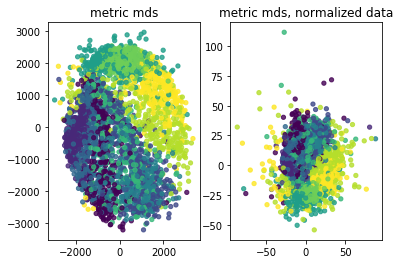

In [40]:
plt.subplot(121)
plt.scatter(x=X[:,0],y=X[:,1],c=labels,alpha=0.8,s=18)
plt.title("metric mds")

plt.subplot(122)
plt.scatter(x=X_norm[:,0],y=X_norm[:,1],c=labels,alpha=0.8,s=18)
plt.title("metric mds, normalized data")

plt.subplots_adjust(hspace=1)

From the plot above it's evident that metric mds performs badly on this dataset as all classes are unseparable

Non-Metric MDS

In [42]:
#non-metric
X=manifold.MDS(n_components=2,metric=False).fit_transform(data_w_labels)
X_norm=manifold.MDS(n_components=2,metric=False).fit_transform(normalized_data)

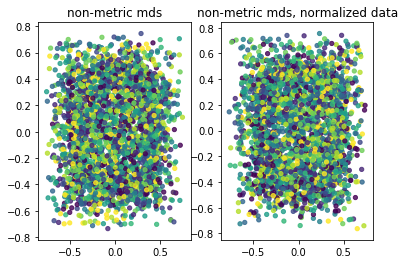

In [43]:
plt.subplot(121)
plt.scatter(x=X[:,0],y=X[:,1],c=labels,alpha=0.8,s=18)
plt.title("non-metric mds")

plt.subplot(122)
plt.scatter(x=X_norm[:,0],y=X_norm[:,1],c=labels,alpha=0.8,s=18)
plt.title("non-metric mds, normalized data")

plt.subplots_adjust(hspace=1)

Non-metric MDS performs even worse than metric MDS as now all classes are scattered in the dimension space

**Locally Linear Embedding**

LLE is a projection algorithms which seeks to find a projection from the data the preserves the local neighbour around each point. LLE performs non-linear mappings, the number of neighbors for each point is a hyperparameter for the algorithm that needs to be tuned.

We play around with the number of neighbors for each point and show the results for two settings below

In [55]:
X=manifold.LocallyLinearEmbedding(n_neighbors=25, n_components=2).fit_transform(data_w_labels)
X_norm=manifold.LocallyLinearEmbedding(n_neighbors=25, n_components=2).fit_transform(normalized_data)

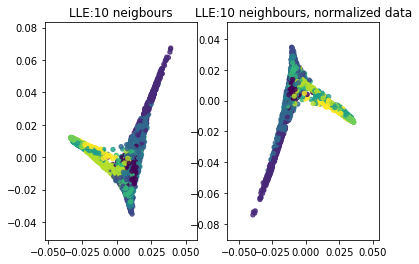

In [56]:
plt.subplot(121)
plt.scatter(x=X[:,0],y=X[:,1],c=labels,alpha=0.8,s=18)
plt.title("LLE:10 neigbours")

plt.subplot(122)
plt.scatter(x=X_norm[:,0],y=X_norm[:,1],c=labels,alpha=0.8,s=18)
plt.title("LLE:10 neighbours, normalized data")

plt.subplots_adjust(hspace=1)

It's clear that classes have significant overlap and no single class is separable

In [61]:
X=manifold.LocallyLinearEmbedding(n_neighbors=700, n_components=2).fit_transform(data_w_labels)
X_norm=manifold.LocallyLinearEmbedding(n_neighbors=700, n_components=2).fit_transform(normalized_data)

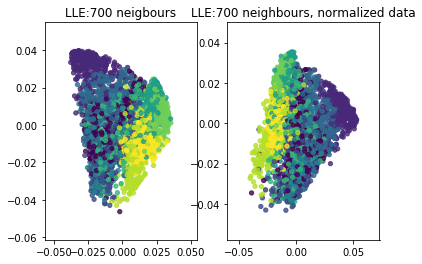

In [63]:
plt.subplot(121)
plt.scatter(x=X[:,0],y=X[:,1],c=labels,alpha=0.8,s=18)
plt.title("LLE:700 neigbours")

plt.subplot(122)
plt.scatter(x=X_norm[:,0],y=X_norm[:,1],c=labels,alpha=0.8,s=18)
plt.title("LLE:700 neighbours, normalized data")

plt.subplots_adjust(hspace=1)

Although the classes are still unseparable we at least could observe some grouping compared to what we have seen so far.

**Isomap**

Isomap seeks a down-projection for the high dimesional data while preserving the neighborhood in the high dimensional space.
Isomap uses geodesic distances, which are the shortest path along the manifold in the high dimensional space.

In [66]:
n=5
X=manifold.Isomap(n_neighbors=n, n_components=2).fit_transform(data_w_labels)
X_norm=manifold.Isomap(n_neighbors=n, n_components=2).fit_transform(normalized_data)

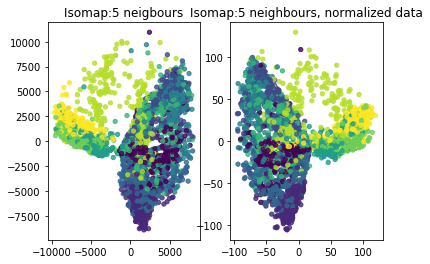

In [67]:
plt.subplot(121)
plt.scatter(x=X[:,0],y=X[:,1],c=labels,alpha=0.8,s=18)
plt.title("Isomap:5 neigbours")

plt.subplot(122)
plt.scatter(x=X_norm[:,0],y=X_norm[:,1],c=labels,alpha=0.8,s=18)
plt.title("Isomap:5 neighbours, normalized data")

plt.subplots_adjust(hspace=1)

Here, we have the light green classes is not completely separable it at least in some part, yet the performance remains bad.

In [77]:
n=700
X=manifold.Isomap(n_neighbors=n, n_components=2).fit_transform(data_w_labels)
X_norm=manifold.Isomap(n_neighbors=n, n_components=2).fit_transform(normalized_data)

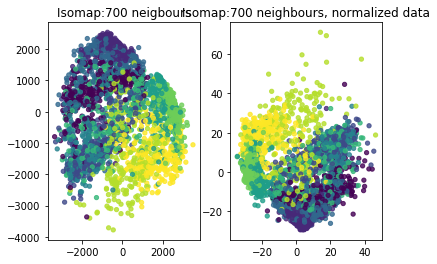

In [80]:
plt.subplot(121)
plt.scatter(x=X[:,0],y=X[:,1],c=labels,alpha=0.8,s=18)
plt.title("Isomap:700 neigbours")

plt.subplot(122)
plt.scatter(x=X_norm[:,0],y=X_norm[:,1],c=labels,alpha=0.8,s=18)
plt.title("Isomap:700 neighbours, normalized data")

plt.subplots_adjust(hspace=1)

In the above plot we have even more overlap than in the previous Isomap setting and we could not distinguish classes clearly

**t-SNE**

The method again seeks a downprojection while preserving the neighborhood. The measurement of similarity between two points is the conditional probability that point xj would pick xi as it's neighbor.
The objective is Kullback liebler divergence between the  distribution in high dimensional space and in the low dimensional one. t-SNE uses the student t-distribution.

In [83]:
X= manifold.TSNE(n_components=2,learning_rate=10).fit_transform(data_w_labels)
X_norm= manifold.TSNE(n_components=2,learning_rate=10).fit_transform(normalized_data)

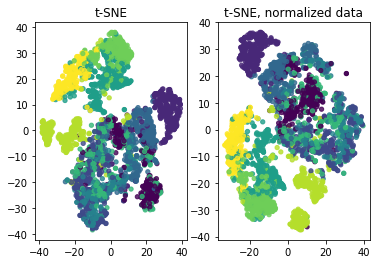

In [84]:
plt.subplot(121)
plt.scatter(x=X[:,0],y=X[:,1],c=labels,alpha=0.8,s=18)
plt.title("t-SNE")

plt.subplot(122)
plt.scatter(x=X_norm[:,0],y=X_norm[:,1],c=labels,alpha=0.8,s=18)
plt.title("t-SNE, normalized data")

plt.subplots_adjust(hspace=1)

t-SNE performs best so far we could roughly see mininal overlapp for light green , yellow and purple(upper right) classes

In [126]:
X= manifold.TSNE(n_components=2,learning_rate=250).fit_transform(data_w_labels)
X_norm= manifold.TSNE(n_components=2,learning_rate=250).fit_transform(normalized_data)

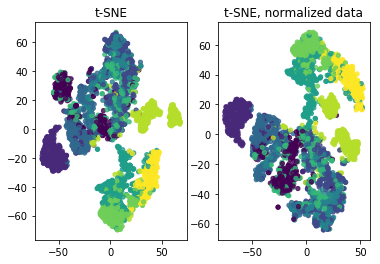

In [127]:
plt.subplot(121)
plt.scatter(x=X[:,0],y=X[:,1],c=labels,alpha=0.8,s=18)
plt.title("t-SNE")

plt.subplot(122)
plt.scatter(x=X_norm[:,0],y=X_norm[:,1],c=labels,alpha=0.8,s=18)
plt.title("t-SNE, normalized data")

plt.subplots_adjust(hspace=1)

With this setting of learning rate we could say we have 4 classes distinguishable to a good extent: purple, yellow,green(upper right) and light green.

**PCA before t-SNE**

PCA performs a linear transformation for the data in the direction of the maximal variance. Where the first component is in the direction of the maximum variance and the second is in the direction of the second maximal variance and so on. It is possible to select K components which explain a certain amount of variance in the data.
Here we use PCA to downproject the data which explaining a portion of the variance as pre-processing for t-SNE.

In [129]:
pca=PCA()
pca.fit(normalized_data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [130]:
cum_var=pca.explained_variance_ratio_.cumsum()

Pick n_components that explain approximately 90% of the variance

In [187]:
components=cum_var[cum_var<0.901].shape[0]
print("components to explain 90% variance=",components)

components to explain 90% variance= 124


In [163]:
cum_var[components-1]

0.9008739816458444

In [164]:
X_pca=PCA(n_components=components).fit_transform(normalized_data)

In [165]:
X_norm= manifold.TSNE(n_components=2,learning_rate=10).fit_transform(X_pca)

Text(0.5,1,'t-SNE,PCA')

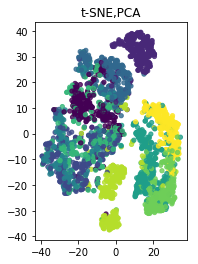

In [166]:
plt.subplot(121)
plt.scatter(x=X_norm[:,0],y=X_norm[:,1],c=labels,alpha=0.8,s=18)
plt.title("t-SNE,PCA")

While PCA through dimensionality reduction should provide a simpler tast for t-SNE. There is no seen improvement for this dataset, although it is now more computationally efficient.

In [171]:
X_norm= manifold.TSNE(n_components=2,learning_rate=100).fit_transform(X_pca)

Text(0.5,1,'t-SNE,PCA')

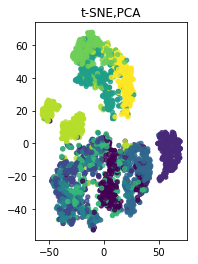

In [172]:
plt.subplot(121)
plt.scatter(x=X_norm[:,0],y=X_norm[:,1],c=labels,alpha=0.8,s=18)
plt.title("t-SNE,PCA")

While PCA through dimensionality reduction should provide a simpler tast for t-SNE. There is no seen improvement for this dataset, although it is now more computationally efficient.